In [1]:
'''
2048 GAME PROJECT: Simple analysis of the DB data using pandas.

Date created:
    04/2022

Author:
    Filip J. Cierkosz
'''

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [2]:
# Connect with the DB and create a pandas dataframe for this purpose.
db = sqlite3.connect('./scores.db')
df = pd.read_sql_query("SELECT * FROM scores", db)

In [3]:
# Display the first 3 records from the DB.
df.head(3)

,id,grid_size,score,time_played_sec,date_played
0,0,3,8,2.498051,06 Mar 2022 09:35:18 PM
1,1,3,8,3.119032,06 Mar 2022 09:35:55 PM
2,2,3,32,37.503346,06 Mar 2022 09:36:42 PM


In [4]:
# Display the last 3 records from the DB.
df.tail(3)

,id,grid_size,score,time_played_sec,date_played
124,124,3,128,123.494435,20 May 2022 01:05:43 PM
125,125,3,64,78.953097,20 May 2022 01:07:12 PM
126,126,3,32,25.108271,20 May 2022 01:08:04 PM


In [5]:
# Calculate the mean for all grids.
df['score'].mean()

144.5984251968504

In [6]:
# Calculate the mean for 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4['score'].mean()

307.42857142857144

In [7]:
# Calculate the median score for all grids (as integer).
df['score'].median().astype(int)

64

In [8]:
# Calculate the median score for 3x3 grid.
df3x3 = df[df['grid_size']==3]
df3x3['score'].median().astype(int)

32

In [9]:
# Calculate the standard deviation for the results.
df['score'].std()

393.3327130713939

In [10]:
# Calculate the standard deviation for the 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4['score'].std()

276.28372809975326

In [11]:
# Count occurrences of different scores.
df.value_counts(['score'])

score
64       38
32       35
128      16
8         9
16        9
512       9
256       7
1024      2
4         1
4096      1
dtype: int64

In [12]:
# Count occurrences of different scores on 3x3 grid.
df3x3 = df[df['grid_size']==3]
df3x3.value_counts(['score'])

score
64       34
32       30
128      14
8         9
16        9
4         1
dtype: int64

In [14]:
# Get the mode for scores from all grids.
df['score'].mode()

0    64
Name: score, dtype: int64

In [15]:
# Get the average game time (seconds, 3 decimal places).
df['time_played_sec'].mean().round(decimals=3)

301.566

In [16]:
# Describe the dataset (excluding the 'id' column, as it would be meaningless).
fields = set(df.columns)-{'id'}
dfDesc = df[list(fields)]
dfDesc.describe()

,grid_size,time_played_sec,score
count,127.000000,127.000000,127.000000
mean,3.259843,301.565588,144.598425
std,0.507290,1227.789467,393.332713
min,3.000000,2.106998,4.000000
25%,3.000000,39.673533,32.000000
50%,3.000000,73.655620,64.000000
75%,3.000000,144.789661,128.000000
max,6.000000,13448.302297,4096.000000


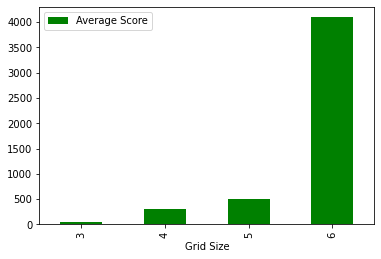

In [17]:
# Plot the diagram showing average scores on different grids.
data = {
    'Grid Size':[3,4,5,6],
    'Average Score':[
                        df[df['grid_size']==3]['score'].mean(),
                        df[df['grid_size']==4]['score'].mean(),
                        df[df['grid_size']==5]['score'].mean(),
                        df[df['grid_size']==6]['score'].mean()
                    ]
}
dfSc = pd.DataFrame(data, columns=['Grid Size','Average Score'])
dfSc.plot(x='Grid Size', y='Average Score', kind='bar', color='green')
plt.show()

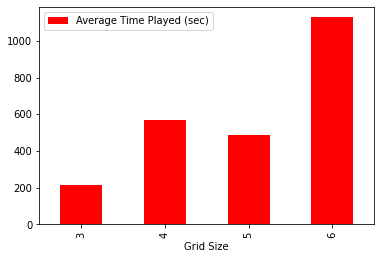

In [18]:
# Plot the diagram showing average time played on different grids.
data = {
    'Grid Size':[3,4,5,6],
    'Average Time Played (sec)':[
                        df[df['grid_size']==3]['time_played_sec'].mean(),
                        df[df['grid_size']==4]['time_played_sec'].mean(),
                        df[df['grid_size']==5]['time_played_sec'].mean(),
                        df[df['grid_size']==6]['time_played_sec'].mean()
                    ]
}
dfSc = pd.DataFrame(data,columns=['Grid Size','Average Time Played (sec)'])
dfSc.plot(x='Grid Size', y='Average Time Played (sec)', kind='bar',color='red')
plt.show()

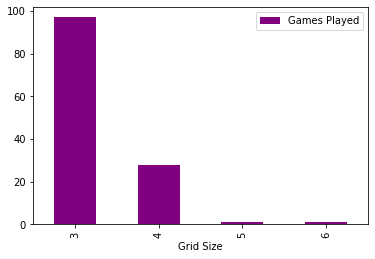

In [19]:
# Determine which grid is mostly used for games and represent it on a graph.
dataDict = df['grid_size'].value_counts().to_dict()
data = {
    'Grid Size':dataDict.keys(),
    'Games Played':dataDict.values()
}
dfSc = pd.DataFrame(data,columns=['Grid Size','Games Played'])
dfSc.plot(x='Grid Size', y='Games Played', kind='bar',color='purple')
plt.show()

<AxesSubplot:title={'center':'score'}, xlabel='grid_size'>

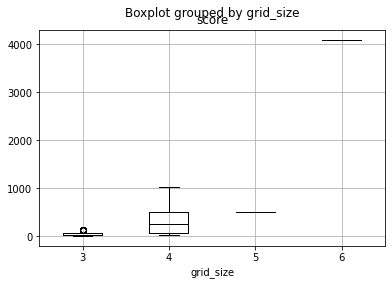

In [20]:
df.boxplot(by ='grid_size', column =['score'], color='black')

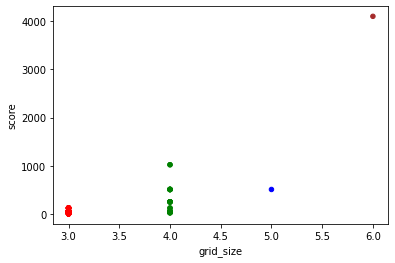

In [21]:
# Scatter diagram.
colors = {3:'red',4:'green',5:'blue',6:'brown'}
df['colors'] = df['grid_size'].map(colors)
df.plot.scatter(x='grid_size',y='score',color=df['colors']);

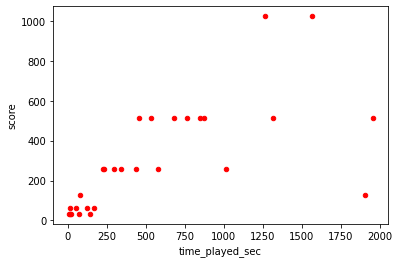

In [22]:
# Scatter diagram showing the relation between time played and obtained score for 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4.plot.scatter(x='time_played_sec',y='score',color='red');

In [23]:
# Display only the records where the grid size is equal to 3 (exlude the column describing colors).
df3x3 = df[df['grid_size']==3]
df3x3.loc[:, df.columns!='colors']

,id,grid_size,score,time_played_sec,date_played
0,0,3,8,2.498051,06 Mar 2022 09:35:18 PM
1,1,3,8,3.119032,06 Mar 2022 09:35:55 PM
2,2,3,32,37.503346,06 Mar 2022 09:36:42 PM
3,3,3,4,3.539565,06 Mar 2022 09:36:58 PM
6,6,3,8,3.330225,06 Mar 2022 10:59:43 PM
...,...,...,...,...,...
119,119,3,32,64.695085,19 Apr 2022 01:22:35 PM
120,120,3,128,121.782091,19 Apr 2022 01:24:45 PM
124,124,3,128,123.494435,20 May 2022 01:05:43 PM
125,125,3,64,78.953097,20 May 2022 01:07:12 PM
